In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

outdir = 'outdir_EccentricFD_recovery'
label = 'EccentricFD_recovery'
bilby.core.utils.setup_logger(outdir=outdir, label=label)

# Set up a random seed for result reproducibility.
np.random.seed(150914)

In [2]:
C = 299792458.0
print("{0:.2E}".format(C))

3.00E+08


In [3]:
mass_1 = 6.5
mass_2 = 5.8
chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1
ff = (C**3)/( G*(mass_1+mass_2)*Mo*np.pi*6**(3/2) )
tot_m = chirp_mass*(1+mass_ratio)**(6/5)/mass_ratio**(3/5)
print(chirp_mass,mass_ratio)
print(ff)
print(tot_m)

5.34347507377356 0.8923076923076922
357.3995964991056
12.299999999999999


In [4]:
chirp_mass_ = 18.11
mass_ratio_ =  0.57

mass_1_ = (chirp_mass_*(1+mass_ratio_)**(1/5))/mass_ratio_**(3/5)
mass_2_ = chirp_mass_*mass_ratio_**(2/5)*(1+mass_ratio_)**(1/5)
print("mass_1 = {}, mass_2 = {}".format(mass_1_, mass_2_))

mass_1 = 27.769845747541925, mass_2 = 15.828812076098897


In [5]:
time_of_event = 1126259642.413
post_trigger_duration = 1.0
duration = 16.0
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 512.

In [6]:
bilby.gw.source.lal_eccentric_advancement_of_pariastron(np.array([0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0]), 6.5,5.8,0.0,200.0,0.4,1.3)

{'plus': array([ 0.00000000e+00+0.00000000e+00j,  9.63825294e-23+2.39755291e-23j,
         4.32620758e-23-9.25965584e-24j,  1.47536248e-24+2.75277943e-23j,
        -1.92833760e-23-4.06675902e-24j,  1.23604934e-23+8.82995283e-24j,
         1.22783605e-23+1.90432845e-25j, -8.96894699e-24-4.97964120e-24j,
        -3.06511524e-24+8.22622841e-24j]),
 'cross': array([ 0.00000000e+00+0.00000000e+00j, -2.38947002e-23+9.60575943e-23j,
         9.22843869e-24+4.31162261e-23j, -2.74349897e-23+1.47038858e-24j,
         4.05304873e-24-1.92183658e-23j, -8.80018435e-24+1.23188224e-23j,
        -1.89790838e-25+1.22369663e-23j,  4.96285330e-24-8.93870992e-24j,
        -8.19849527e-24-3.05478179e-24j])}

In [7]:
bilby.gw.source.lal_taylorF2_fd(np.array([0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0]), 6.5,5.8,200.0,0.0,0.0,0.4,1.3)

{'plus': array([ 0.00000000e+00+0.00000000e+00j,  9.63825294e-23+2.39755291e-23j,
         4.17864319e-23-1.45341853e-23j,  5.62592385e-24+2.69871291e-23j,
        -1.96877913e-23-8.82039341e-25j,  1.36674186e-23+6.62959533e-24j,
         1.21299232e-23-1.91294642e-24j, -9.69557933e-24-3.35180221e-24j,
        -1.58266069e-24+8.63486829e-24j]),
 'cross': array([ 0.00000000e+00+0.00000000e+00j,  2.38947002e-23-9.60575943e-23j,
        -1.44851861e-23-4.16455570e-23j,  2.68961472e-23-5.60695714e-24j,
        -8.79065715e-25+1.96214177e-23j,  6.60724493e-24-1.36213415e-23j,
        -1.90649729e-24-1.20890295e-23j, -3.34050226e-24+9.66289256e-24j,
         8.60575750e-24+1.57732505e-24j])}

In [8]:
# frequency_array, mass_1, mass_2, luminosity_distance, a_1, a_2, theta_jn, phase
injection_parameters = dict(
    mass_1=6.5, mass_2=5.8, a_1=0.0, a_2=0.0, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

waveform_arguments = dict(waveform_approximant='PeriastronEccFD',
                          reference_frequency=0., minimum_frequency=10., catch_waveform_errors=True)

waveform_arguments2 = dict(waveform_approximant='TaylorF2',
                          reference_frequency=0., minimum_frequency=10., catch_waveform_errors=True)

waveform_generator = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_eccentric_advancement_of_pariastron,
    waveform_arguments=waveform_arguments)

waveform_generator2 = bilby.gw.WaveformGenerator(
    duration=duration, sampling_frequency=sampling_frequency,
    frequency_domain_source_model=bilby.gw.source.lal_taylorF2_fd,
    waveform_arguments=waveform_arguments2)



14:58 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_eccentric_advancement_of_pariastron
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters
14:58 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_taylorF2_fd
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


In [9]:
ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

ifos.inject_signal(waveform_generator=waveform_generator2,
                   parameters=injection_parameters)



14:58 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
14:58 bilby INFO    : Injected signal in H1:
14:58 bilby INFO    :   optimal SNR = 31.91
14:58 bilby INFO    :   matched filter SNR = 31.41+0.67j
14:58 bilby INFO    :   mass_1 = 6.5
14:58 bilby INFO    :   mass_2 = 5.8
14:58 bilby INFO    :   a_1 = 0.0
14:58 bilby INFO    :   a_2 = 0.0
14:58 bilby INFO    :   luminosity_distance = 200.0
14:58 bilby INFO    :   theta_jn = 0.4
14:58 bilby INFO    :   psi = 2.659
14:58 bilby INFO    :   phase = 1.3
14:58 bilby INFO    :   geocent_time = 1126259642.413
14:58 bilby INFO    :   ra = 1.375
14:58 bilby INFO    :   dec = -1.2108
14:58 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
14:58 bilby INFO    : Injected signal in L1:
14:58 bilby INFO    :   optimal SNR = 25.83
14:58 bilby INFO    :   matched filter SNR = 26.58+1.99j
14:58 bilby INFO    :   mass_1 = 6.5
14:58 bilby INFO    :   mass_2 = 5.8
14:58 bilby INFO    :   a_1 = 0.0
14:5

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.97857647e-24+1.09462499e-24j, -1.98198338e-24+1.08710519e-24j,
         -1.98535901e-24+1.07958089e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.09093468e-24+1.97190608e-24j, 1.08344022e-24+1.97530151e-24j,
         1.07594130e-24+1.97866575e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.97857647e-24+1.09462499e-24j, -1.98198338e-24+1.08710519e-24j,
         -1.98535901e-24+1.07958089e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.09093468e-24+1.97190608e-24j, 1.08344022e-24+1.97530151e-24j,
         1.07594130e-24+1.97866575e-24j])}]

14:58 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
14:58 bilby INFO    : Injected signal in H1:
14:58 bilby INFO    :   optimal SNR = 31.91
14:58 bilby INFO    :   matched filter SNR = 33.54+0.47j
14:58 bilby INFO    :   mass_1 = 6.5
14:58 bilby INFO    :   mass_2 = 5.8
14:58 bilby INFO    :   eccentricity = 0.0
14:58 bilby INFO    :   luminosity_distance = 200.0
14:58 bilby INFO    :   theta_jn = 0.4
14:58 bilby INFO    :   psi = 2.659
14:58 bilby INFO    :   phase = 1.3
14:58 bilby INFO    :   geocent_time = 1126259642.413
14:58 bilby INFO    :   ra = 1.375
14:58 bilby INFO    :   dec = -1.2108
14:58 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
14:58 bilby INFO    : Injected signal in L1:
14:58 bilby INFO    :   optimal SNR = 25.83
14:58 bilby INFO    :   matched filter SNR = 24.56-0.60j
14:58 bilby INFO    :   mass_1 = 6.5
14:58 bilby INFO    :   mass_2 = 5.8
14:58 bilby INFO    :   eccentricity = 0.0
14:58 bilby INFO    

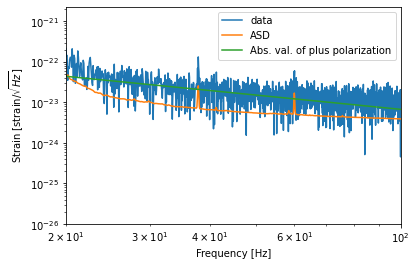

In [10]:
injection_parameters = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.0, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

#to plot the frequency domain  
injection = ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

H1 = ifos[0]
H1_injection = injection[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")
ax.loglog(H1.frequency_array[idxs],
          np.abs(H1_injection["plus"][idxs]),
          label="Abs. val. of plus polarization")

'''L1 = ifos[1]
L1_injection = injection[1]

ax.loglog(L1.frequency_array[idxs]+5,
          L1.amplitude_spectral_density_array[idxs],
          label="ASD")'''

ax.set_xlim(20.,100.)
ax.set_ylim(1e-26,2.327737159425905e-21)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [11]:
snrs = [ifo.meta_data["optimal_SNR"] for ifo in ifos]
np.sqrt(np.sum([i ** 2 for i in snrs]))

41.05299146999303

In [12]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.gw.prior.Uniform(name='chirp_mass', minimum=3.482202253184496, maximum=6.964404506368993, unit='Mo')
prior['mass_ratio'] = bilby.gw.prior.Uniform(name='mass_ratio', minimum=0.5, maximum=1.0)
prior['eccentricity'] = 0.0
prior["luminosity_distance"] = bilby.gw.prior.Uniform(name='luminosity_distance', minimum=1e1, maximum=1e3, unit='Mpc')
prior["theta_jn"] = 0.4
prior["psi"] = 2.659
prior["phase"] = 1.3
prior["geocent_time"] = 1126259642.413
prior["ra"] = 1.375
prior["dec"] = -1.2108


    
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior)



In [9]:
'''result_short = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,
    nlive=500, dlogz=3.0, npool=8 )'''

"result_short = bilby.core.sampler.run_sampler(\n    likelihood, prior, sampler='dynesty', outdir=outdir, label=label,\n    nlive=500, dlogz=3.0, npool=8 )"

In [14]:
# frequency_array, mass_1, mass_2, luminosity_distance, a_1, a_2, theta_jn, phase
injection_parameters = dict(
    mass_1=6.5, mass_2=5.8, eccentricity=0.0001, luminosity_distance=200., theta_jn=0.4, psi=2.659,
    phase=1.3, geocent_time=1126259642.413, ra=1.375, dec=-1.2108)

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1'])
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

ifos.inject_signal(waveform_generator=waveform_generator,
                   parameters=injection_parameters)

13:34 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:34 bilby INFO    : Injected signal in H1:
13:34 bilby INFO    :   optimal SNR = 31.90
13:34 bilby INFO    :   matched filter SNR = 33.39+0.45j
13:34 bilby INFO    :   mass_1 = 6.5
13:34 bilby INFO    :   mass_2 = 5.8
13:34 bilby INFO    :   eccentricity = 0.0001
13:34 bilby INFO    :   luminosity_distance = 200.0
13:34 bilby INFO    :   theta_jn = 0.4
13:34 bilby INFO    :   psi = 2.659
13:34 bilby INFO    :   phase = 1.3
13:34 bilby INFO    :   geocent_time = 1126259642.413
13:34 bilby INFO    :   ra = 1.375
13:34 bilby INFO    :   dec = -1.2108
13:34 bilby INFO    : Generation of spin parameters failed with message 'spin_1z'
13:34 bilby INFO    : Injected signal in L1:
13:34 bilby INFO    :   optimal SNR = 25.83
13:34 bilby INFO    :   matched filter SNR = 24.97-0.37j
13:34 bilby INFO    :   mass_1 = 6.5
13:34 bilby INFO    :   mass_2 = 5.8
13:34 bilby INFO    :   eccentricity = 0.0001
13:34 bilby IN

[{'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.89539451e-24-1.89539451e-24j, -1.89932982e-24-1.89932982e-24j,
         -1.90323425e-24-1.90323425e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.88900455e-24-1.88900455e-24j, 1.89292660e-24-1.89292660e-24j,
         1.89681786e-24-1.89681786e-24j])},
 {'plus': array([ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j, ...,
         -1.89539451e-24-1.89539451e-24j, -1.89932982e-24-1.89932982e-24j,
         -1.90323425e-24-1.90323425e-24j]),
  'cross': array([0.00000000e+00+0.00000000e+00j, 0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         1.88900455e-24-1.88900455e-24j, 1.89292660e-24-1.89292660e-24j,
         1.89681786e-24-1.89681786e-24j])}]

In [15]:
import pandas as pd

df1 = pd.read_csv( 'taylorF2.txt', delimiter='\t', names=["idx","f","shft","phi_ref","ref_phasing","phasing"] )

psi1 = np.array(df1['phasing'].values)

f1 = np.array(df1['f'].values)

In [16]:
df2 = pd.read_csv( 'periastronEccFD.txt', delimiter='\t', names=["idx","f","shft","phi_ref","ref_phasing","phasing"] )

psi2 = np.array(df2['phasing'].values)

f2 = np.array(df2['f'].values)

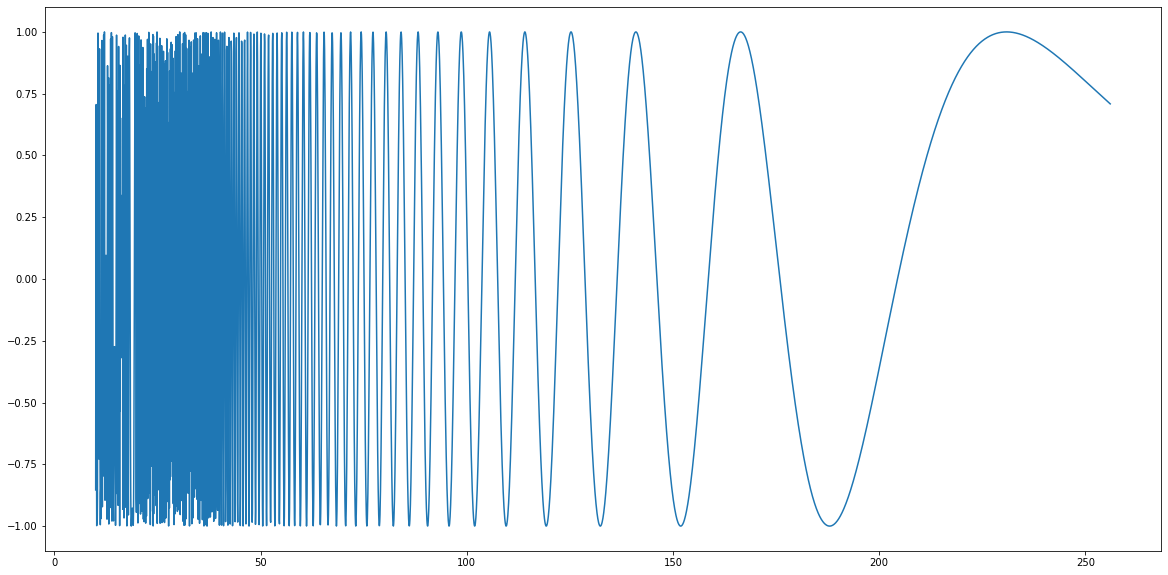

In [35]:
plt.plot(f1,np.cos(psi1))
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

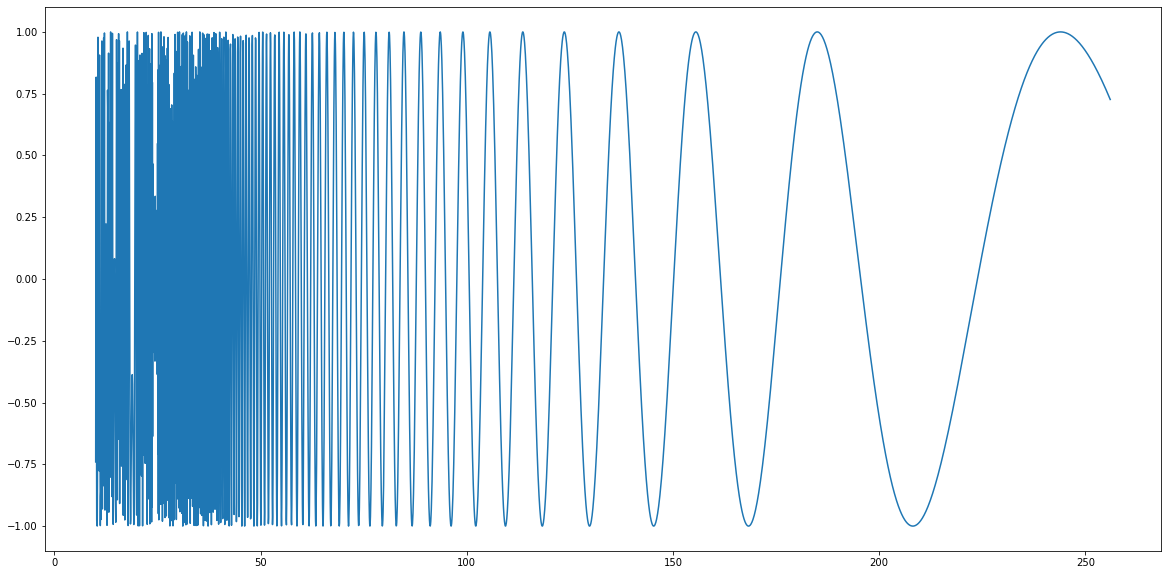

In [36]:
plt.plot(f2,np.cos(psi2))
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

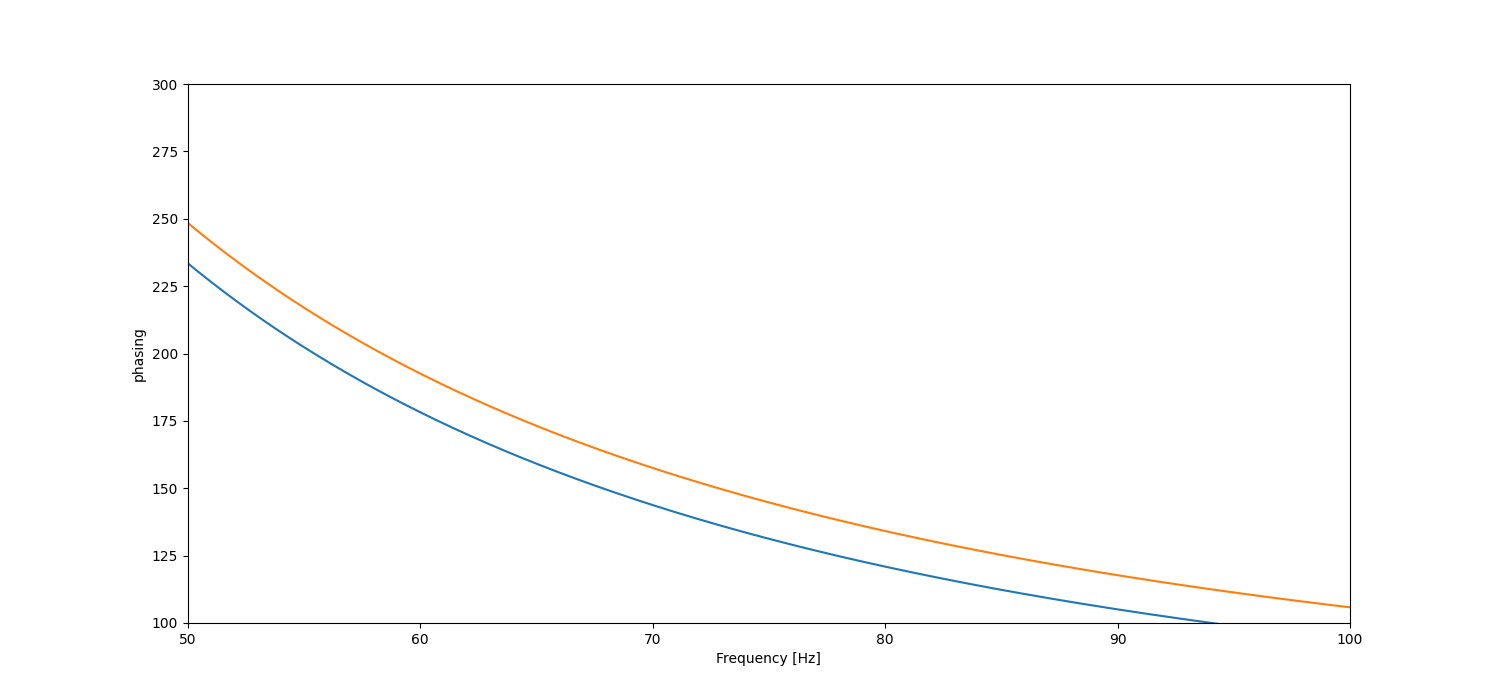

In [55]:
fig, ax = plt.subplots()

ax.plot(f1,psi1+95)
ax.plot(f2,psi2)

ax.set_xlim(50.,100.)
ax.set_ylim(100.,300.)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("phasing")
#ax.legend()
plt.rcParams['figure.figsize'] = [15, 7]
plt.show()

interactive(children=(FloatSlider(value=47.0, description='phi', max=141.0, min=-47.0), Output()), _dom_classe…

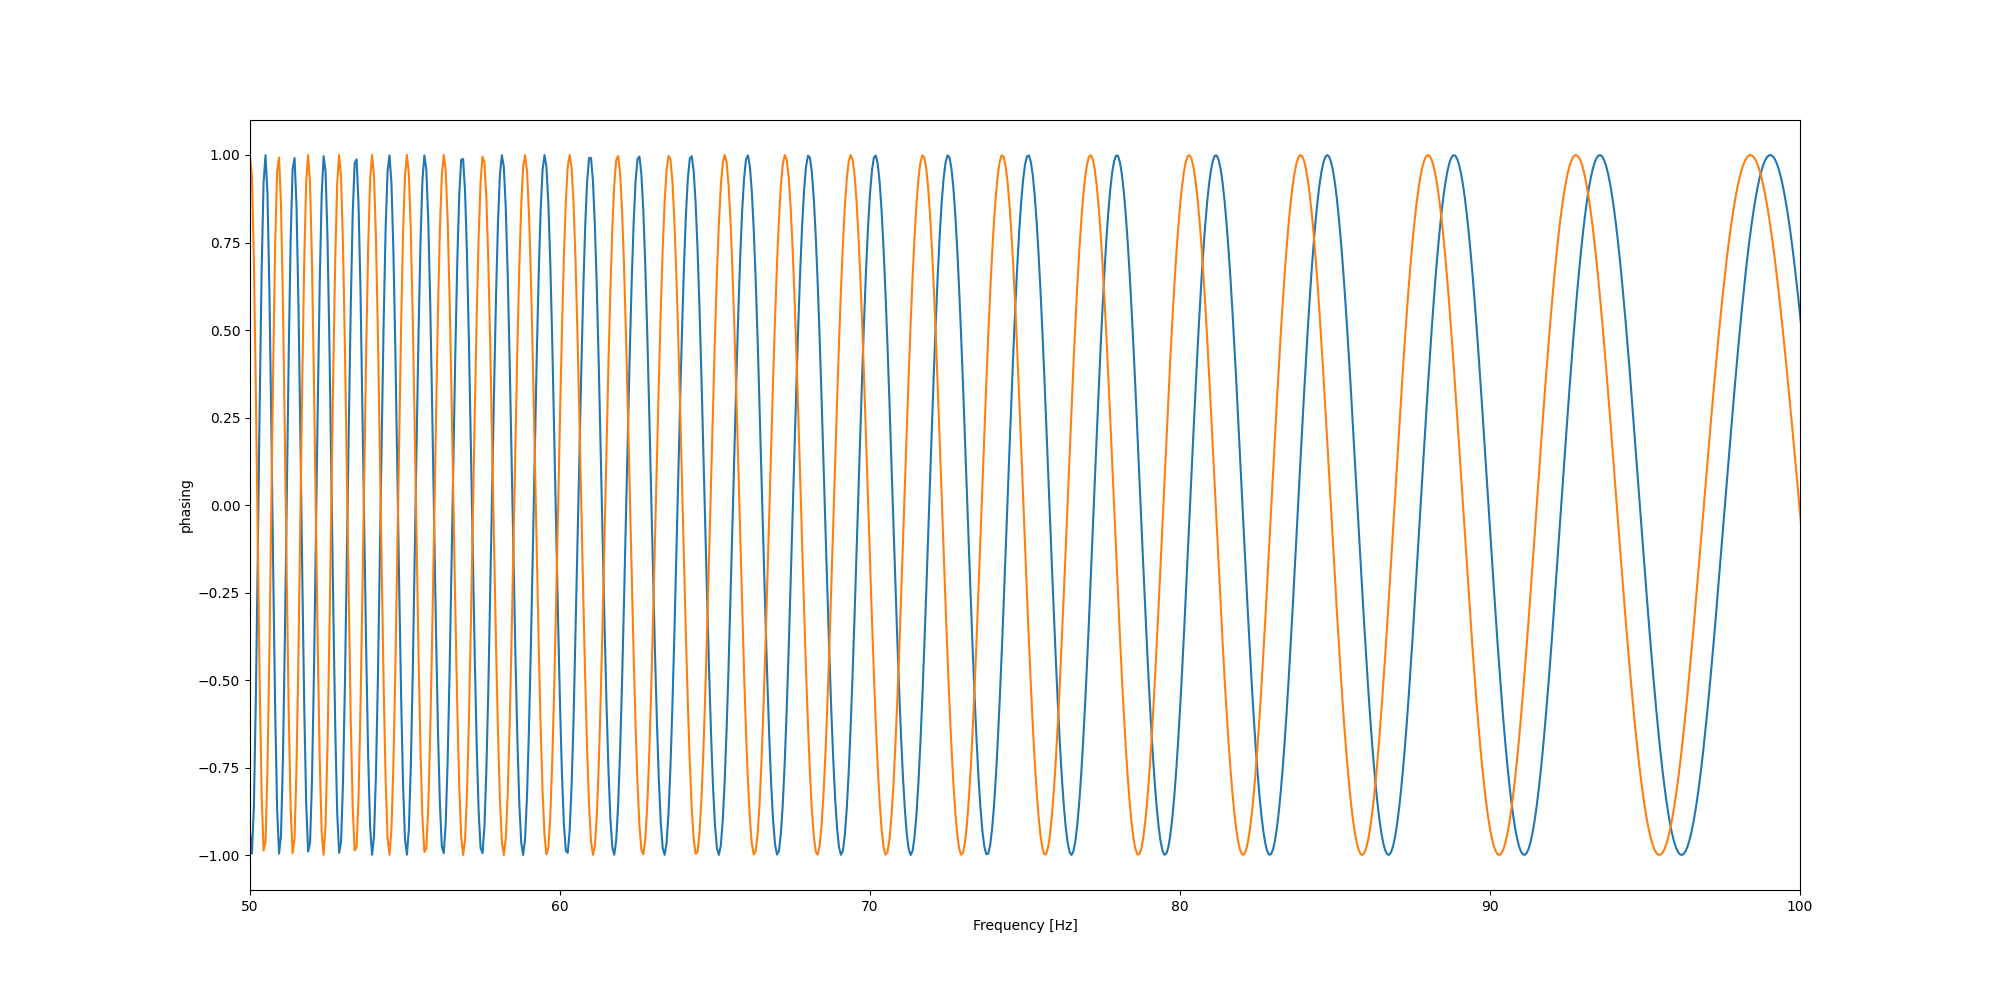

In [37]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()


ax.plot(f2,np.cos(psi2))
line, = ax.plot(f1,np.cos(psi1))

ax.set_xlim(50.,100.)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("phasing")
#ax.legend()
plt.rcParams['figure.figsize'] = [14, 3]




def update(phi = ):
    line.set_ydata(np.cos(psi1 + 2.0*phi))
    fig.canvas.draw_idle()

interact(update);

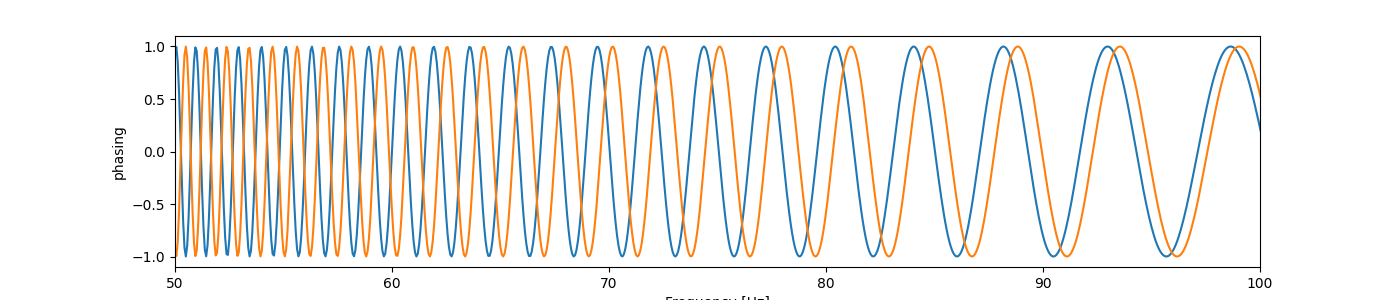

In [38]:
fig, ax = plt.subplots()

ax.plot(f1,np.cos(psi1))
ax.plot(f2,np.cos(psi2))

ax.set_xlim(50.,100.)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("phasing")
#ax.legend()
plt.rcParams['figure.figsize'] = [14, 3]

In [50]:
psi1[-100]-psi2[-100]

-1521.8663609999999

In [58]:
fig, ax = plt.subplots()


ax.plot(f2,psi2)
line, = ax.plot(f1,psi1)

ax.set_xlim(50.,60.)
ax.set_ylim(240.,250.)
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("phasing")
#ax.legend()
plt.rcParams['figure.figsize'] = [14, 7]




def update(phi = 95):
    line.set_ydata(psi1+phi)
    fig.canvas.draw_idle()

interact(update);

interactive(children=(IntSlider(value=95, description='phi', max=285, min=-95), Output()), _dom_classes=('widg…